In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('../Data/weatherAUS.csv')

In [4]:
# Drop rows with missing target values (RainTomorrow)
data = data.dropna(subset=['RainTomorrow'])

# Select relevant features and target variable
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
            'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 
            'Temp9am', 'Temp3pm', 'RainToday']

target = 'RainTomorrow'

In [5]:
X = data[features]
y = data[target]

# Encode categorical variable 'RainToday' using LabelEncoder
encoder = LabelEncoder()
X['RainToday'] = encoder.fit_transform(X['RainToday'].astype(str))

# Handle missing values by filling with mean of each column
X = X.fillna(X.mean())

In [6]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [8]:
# Train the Decision Tree classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [11]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          No       0.86      0.86      0.86     22098
         Yes       0.52      0.53      0.52      6341

    accuracy                           0.78     28439
   macro avg       0.69      0.69      0.69     28439
weighted avg       0.79      0.78      0.79     28439



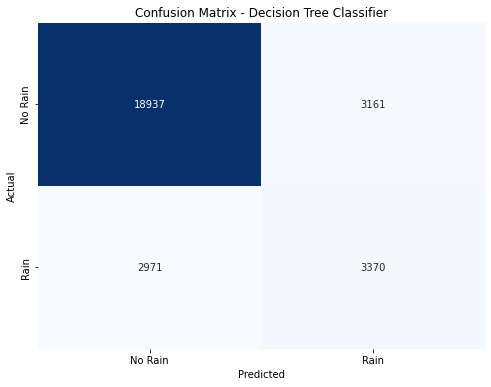

In [12]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

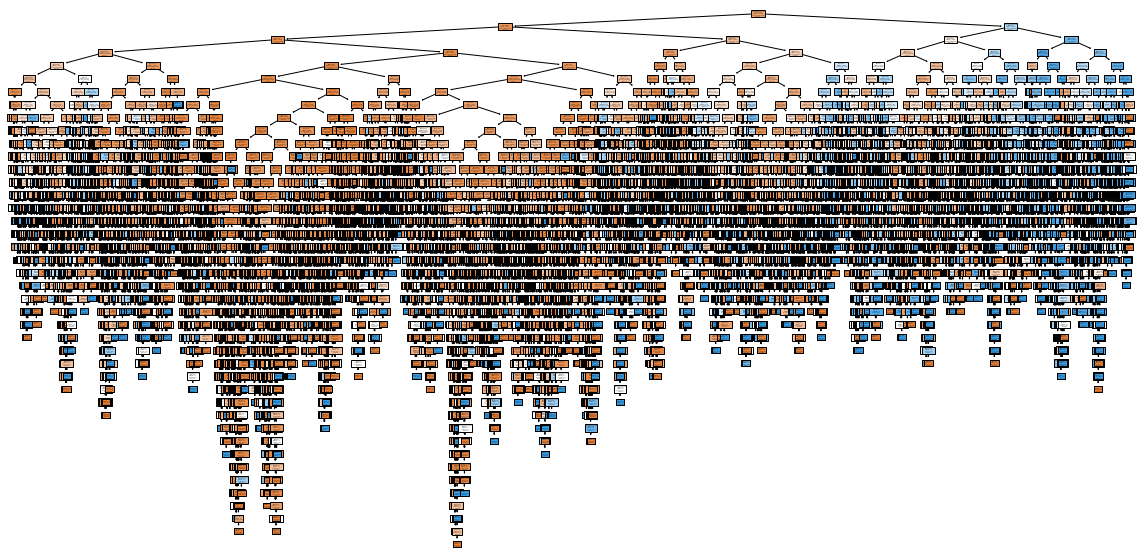

In [13]:
plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
plot_tree(dt_classifier, feature_names=features, class_names=['0', '1'], filled=True)
plt.show()

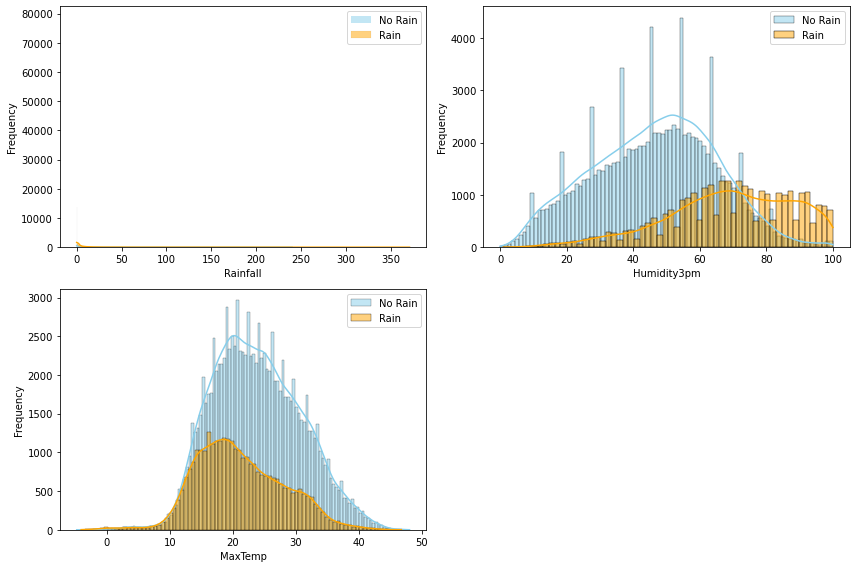

In [14]:
# Select features of interest for visualization
features_of_interest = ['Rainfall', 'Humidity3pm', 'MaxTemp']

# Plot distributions of selected features by target class
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_of_interest, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[data['RainTomorrow']=='No'][feature], color='skyblue', kde=True, label='No Rain')
    sns.histplot(data[data['RainTomorrow']=='Yes'][feature], color='orange', kde=True, label='Rain')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

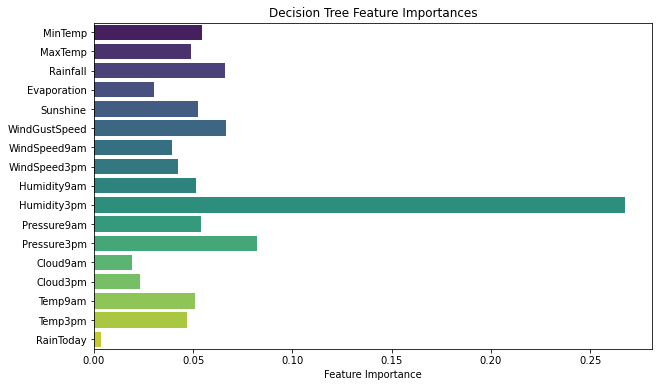

In [16]:
feature_importances = pd.Series(dt_classifier.feature_importances_, index=features)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, orient='h', palette='viridis')
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.show()